# **Домашнее задание №1**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import plotly.express as px
import statsmodels.formula.api as smf

%config IPCompleter.greedy = True
%matplotlib inline

# Прогноз популярности песни

Пусть мы являемся продюссером некоторого исполнителя или автором песни. Мы хотим явить наше творение народу, будучи уверенными в том, что все наши старания не напрасны, что нам удастся стать популярными среди слушателей и заработать миллионы денег. Для этого мы собрали данные о песнях, находящихся в последнее время в топах популярных музыкальных платформ, чтобы проанализировать признаки, по которым песня, вероятнее всего, станет популярной.

Подгружаем файл с данными с GitHub:

In [105]:
url = "https://raw.githubusercontent.com/nastyalabs/machlearn/main/song_data.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о почти 19 тысячах песен, выходящих в топы чартов по всему миру на протяжении последних нескольких лет. Для каждой песни указано название, популярность (в процентах), продолжительность (в мс), акустическая мощность и танцевальность, энергичность и инструментальность, живость и текстовая наполненность, аудиовалентность (в долях), громкость (в децибелах), темп (в такты/секунда) и музыкальный размер такта (одна, две, три, четыре четверти, пять шестых).

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной песне) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [106]:
data_raw.shape

(18835, 15)

In [107]:
data_raw

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [108]:
data_raw.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [109]:
data_raw.at[data_raw['song_popularity'] <= 10, 'song_popularity'] = 0
data_raw.at[(data_raw['song_popularity'] <= 20) & (data_raw['song_popularity'] > 10), 'song_popularity'] = 1
data_raw.at[(data_raw['song_popularity'] <= 30) & (data_raw['song_popularity'] > 20), 'song_popularity'] = 2
data_raw.at[(data_raw['song_popularity'] <= 40) & (data_raw['song_popularity'] > 30), 'song_popularity'] = 3
data_raw.at[(data_raw['song_popularity'] <= 50) & (data_raw['song_popularity'] > 40), 'song_popularity'] = 4
data_raw.at[(data_raw['song_popularity'] <= 60) & (data_raw['song_popularity'] > 50), 'song_popularity'] = 5
data_raw.at[(data_raw['song_popularity'] <= 70) & (data_raw['song_popularity'] > 60), 'song_popularity'] = 6
data_raw.at[(data_raw['song_popularity'] <= 80) & (data_raw['song_popularity'] > 70), 'song_popularity'] = 7
data_raw.at[(data_raw['song_popularity'] <= 90) & (data_raw['song_popularity'] > 80), 'song_popularity'] = 8
data_raw.at[(data_raw['song_popularity'] <= 100) & (data_raw['song_popularity'] > 90), 'song_popularity'] = 9

Мы видим наличие следующих признаков:

- `song_name` - название песни
- `song_popularity` - популярность (место в топ-100)
- `song_duration_ms` - длительность (в мс)
- `acousticness` - акустичность (в долях)
- `danceability` - танцевальность (в долях)
- `energy` - энергичность (в долях)
- `instrumentalness` - инструментальность (в долях)
- `liveness` - живость (в долях)
- `loudness` - громкость (в дБ)
- `speechiness` - текстовая наполненность (в долях)
- `tempo` - темп (в тактах/секунда)
- `time_signature` - музыкальный размер такта (1/4 или 3/4 или 5/6 или 1/2)
- `audio_valence` - аудиовалентность (в долях)

Признак `song_name` - текстовый, все остальные признаки - числовые.

Требуется предсказать числовой признак `song_popularity` по остальным признакам. Это задача восстановления регрессии.

In [110]:
data_raw.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,4.765277,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,2.181833,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,5.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,6.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,9.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Давайте проверим, имеются ли пропущенные значения в нашем сете:

In [111]:
data_raw.isna().sum()  

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Пропущенных значений у нас нет, двигаемся дальше!

In [112]:
data_raw['song_popularity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    2.0
0.500    5.0
0.900    7.0
0.950    8.0
0.990    9.0
0.995    9.0
Name: song_popularity, dtype: float64

$99\%$ всех значений признака `'song_popularity'` находится в диапазоне от $0$ до $97$ места в чартах (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [113]:
data_raw['song_duration_ms'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     90231.26
0.010    104965.02
0.050    141586.00
0.100    159242.00
0.500    211306.00
0.900    282742.40
0.950    313786.00
0.990    414569.66
0.995    456612.80
Name: song_duration_ms, dtype: float64

$99\%$ всех значений `'song_duration_ms'` находится в диапазоне от $90$ до $457$ секунд

Удалим все строки таблицы, в которых `'song_popularity'` или `'song_duration_ms'` выходят за пределы квантилей $0.005$, $0.995$.

In [114]:
rows_to_drop = data_raw[
    (data_raw['song_popularity'] < data_raw['song_popularity'].quantile(0.005)) | (data_raw['song_popularity'] > data_raw['song_popularity'].quantile(0.995)) | 
    (data_raw['song_duration_ms']  < data_raw['song_duration_ms' ].quantile(0.005)) | (data_raw['song_duration_ms']  > data_raw['song_duration_ms' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(18645, 15)

In [115]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000,18645.000000
mean,4.772647,217099.343524,0.256344,0.633713,0.646460,0.074515,5.287369,0.179490,-7.406978,0.629069,0.101652,121.162262,3.959507,0.528381
std,2.184958,51346.106553,0.287172,0.156486,0.213124,0.216150,3.613533,0.143417,3.790378,0.483067,0.102973,28.678167,0.296264,0.244448
min,0.000000,90379.000000,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,184720.000000,0.023700,0.534000,0.512000,0.000000,2.000000,0.092800,-8.993000,0.000000,0.037700,98.832000,4.000000,0.335000
50%,5.000000,211306.000000,0.131000,0.645000,0.675000,0.000011,5.000000,0.122000,-6.530000,1.000000,0.055400,120.016000,4.000000,0.527000
75%,6.000000,242306.000000,0.419000,0.748000,0.816000,0.002280,8.000000,0.222000,-4.894000,1.000000,0.119000,139.942000,4.000000,0.726000
max,9.000000,456480.000000,0.996000,0.987000,0.999000,0.989000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


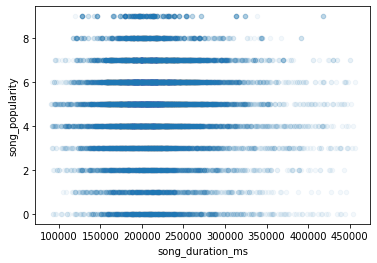

In [116]:
data.plot(kind = 'scatter', x = 'song_duration_ms', y = 'song_popularity', alpha=.05)
pass

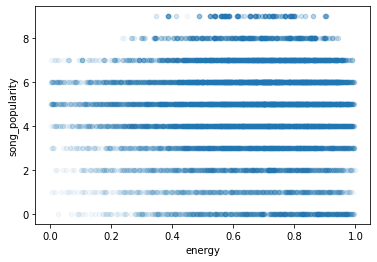

In [117]:
data.plot(kind = 'scatter', x = 'energy', y = 'song_popularity', alpha=0.05)
pass

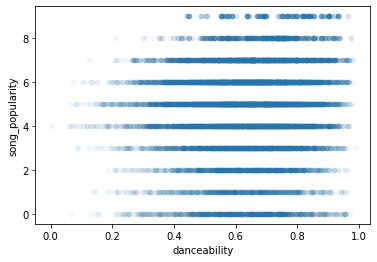

In [118]:
data.plot(kind = 'scatter', x = 'danceability', y = 'song_popularity', alpha=0.05)
pass

Посчитаем матрицу корреляции:

In [119]:
corr_mat = data.corr()
corr_mat

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.011856,-0.065561,0.106874,0.002201,-0.129435,-0.010474,-0.036506,0.099787,-0.005711,0.026600,-0.023935,0.034830,-0.054795
song_duration_ms,-0.011856,1.000000,-0.100306,-0.102166,0.087202,-0.012722,-0.003081,0.001647,0.016721,-0.032946,-0.083729,0.006933,-0.012920,-0.069671
acousticness,-0.065561,-0.100306,1.000000,-0.183074,-0.661253,0.162702,-0.004033,-0.082871,-0.554921,0.066919,-0.106465,-0.132590,-0.157016,-0.121685
danceability,0.106874,-0.102166,-0.183074,1.000000,0.044240,-0.134998,0.008885,-0.089135,0.176893,-0.106625,0.214088,-0.123658,0.134206,0.331131
energy,0.002201,0.087202,-0.661253,0.044240,1.000000,-0.194575,0.023406,0.166623,0.754671,-0.053964,0.070918,0.159735,0.148549,0.318278
instrumentalness,-0.129435,-0.012722,0.162702,-0.134998,-0.194575,1.000000,-0.013701,-0.030966,-0.380853,-0.011589,-0.085830,-0.034070,-0.068719,-0.182280
key,-0.010474,-0.003081,-0.004033,0.008885,0.023406,-0.013701,1.000000,-0.008937,0.013018,-0.170184,0.034511,0.004240,-0.007567,0.027230
liveness,-0.036506,0.001647,-0.082871,-0.089135,0.166623,-0.030966,-0.008937,1.000000,0.103375,-0.002049,0.091729,0.032573,0.014739,0.016193
loudness,0.099787,0.016721,-0.554921,0.176893,0.754671,-0.380853,0.013018,0.103375,1.000000,-0.061217,0.089855,0.128863,0.120626,0.199227
audio_mode,-0.005711,-0.032946,0.066919,-0.106625,-0.053964,-0.011589,-0.170184,-0.002049,-0.061217,1.000000,-0.113745,0.019036,-0.024755,-0.002899


Построим визуальный образ матрицы корреляции:

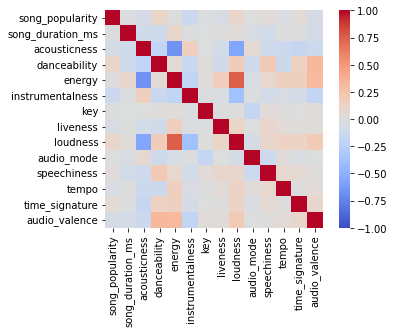

In [120]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Здесь можем видеть корреляцию признаков `loudness` и `energy`, `danceability` и `audio_valence`. Я считаю, что это довольно близко с реальностью, так как для придачи музыке энергичности часто используют мощные громкие аккорды, которые быстро сменяют друг друга, а в пляс хочется броситься от тех песен, которые целиком захватывают все пространство дискозала. Признаки `acousticness` и `loudness` сильно коррелируют из-за того, что по своей сути относятся примерно к одной и той же оценке.

In [121]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,7,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,6,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,7,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,7,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,5,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


Выполним стандартизацию всех признаков:

In [122]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [123]:
data_stand.describe()

,acousticness,audio_mode,audio_valence,danceability,energy,instrumentalness,key,liveness,loudness,song_duration_ms,song_popularity,speechiness,tempo,time_signature
count,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04,1.864500e+04
mean,-3.201158e-17,-1.147082e-16,-1.615823e-16,-4.481621e-16,-1.798746e-16,-4.496865e-17,-1.981669e-17,1.882586e-16,-1.219489e-17,-1.265220e-16,-7.926677e-17,7.088278e-17,3.384081e-16,4.786493e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.926469e-01,-1.302241e+00,-2.161528e+00,-4.049636e+00,-3.028239e+00,-3.447360e-01,-1.463213e+00,-1.175520e+00,-8.273850e+00,-2.467964e+00,-2.184319e+00,-9.871706e-01,-4.224896e+00,-1.336479e+01
25%,-8.101215e-01,-1.302241e+00,-7.910919e-01,-6.371970e-01,-6.309019e-01,-3.447360e-01,-9.097383e-01,-6.044599e-01,-4.184336e-01,-6.306095e-01,-8.112955e-01,-6.210559e-01,-7.786503e-01,1.366802e-01
50%,-4.364778e-01,7.678658e-01,-5.648076e-03,7.213010e-02,1.339113e-01,-3.446870e-01,-7.952585e-02,-4.008584e-01,2.313697e-01,-1.128293e-01,1.040538e-01,-4.491664e-01,-3.996986e-02,1.366802e-01
75%,5.664055e-01,7.678658e-01,8.084318e-01,7.303346e-01,7.954981e-01,-3.341878e-01,7.506866e-01,2.964069e-01,6.629888e-01,4.909166e-01,5.617284e-01,1.684701e-01,6.548444e-01,1.366802e-01
max,2.575654e+00,7.678658e-01,1.863872e+00,2.257625e+00,1.654153e+00,4.230783e+00,1.580899e+00,5.623514e+00,2.372317e+00,4.662099e+00,1.934752e+00,8.151132e+00,4.224668e+00,3.512049e+00


Подготовка данных к работе:

In [124]:
clean_duplicated = data.duplicated(subset = None, keep = 'first')
n_duplicated = clean_duplicated[clean_duplicated == True].shape[0]
data = data.drop_duplicates(subset = None, keep = 'first')
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,7,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,6,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,7,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,7,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,5,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,5,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,5,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),2,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,5,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14698 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14698 non-null  object 
 1   song_popularity   14698 non-null  int64  
 2   song_duration_ms  14698 non-null  int64  
 3   acousticness      14698 non-null  float64
 4   danceability      14698 non-null  float64
 5   energy            14698 non-null  float64
 6   instrumentalness  14698 non-null  float64
 7   key               14698 non-null  int64  
 8   liveness          14698 non-null  float64
 9   loudness          14698 non-null  float64
 10  audio_mode        14698 non-null  int64  
 11  speechiness       14698 non-null  float64
 12  tempo             14698 non-null  float64
 13  time_signature    14698 non-null  int64  
 14  audio_valence     14698 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


In [126]:
x = data.drop(['song_name'], axis=1)
y = data['song_popularity']

Разобьем выборку на обучающую и тестовую в пропорции $3:1$:

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

11023 3675


Применим метод $k$ ближайших соседей:

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.5313435543862832 0.8737414965986394


Изменим число соседей:

In [157]:
knn = KNeighborsClassifier(1000)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.7845414134083281 0.7828571428571428


In [132]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.0 0.8519727891156462


Имеет место переобучение, как и ожидалось при выборе 1 соседа.

Можно сделать вывод, что предсказать популярность песни все равно сложно, несмотря на то, что мы начали предсказывать промежуток популярности, а не конкретное место в рейтинге. Это ожидаемо, так как в противном случае все исполнители пользовались бы машинным обучением для вывода своих песен в топ.